In [1]:
from scipy.signal import lfilter, tf2zpk, zpk2tf, freqz, group_delay, freqs_zpk 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from math import e, pi, sin, cos

In [5]:
%matplotlib inline

In [87]:
def plot_response(w, h, title = 'Frequency response', f0 = None, log = False, lin = False) :
    fig = plt.figure ()
    ax1 = fig.add_subplot (111)
    if log :
        ax1.set_xscale ('log')
    plt.title (title)
    xlabel = 'Freq [rad/sample]'
    if f0 is not None :
        w = np.array (w) * f0 / (2 * pi)
        xlabel = 'Freq (Hz)'
        if f0 == 1.0 :
            xlabel = '$\\Omega$'
    if lin :
        plt.plot (w, abs (h), 'b')
        plt.ylabel ('Amplitude (lin.)', color = 'b')
    else :
        plt.plot (w, 20 * np.log10 (abs (h)), 'b')
        plt.ylabel ('Amplitude (dB)', color = 'b')
    plt.xlabel (xlabel)
    plt.grid (which = 'both')

    ax2 = ax1.twinx ()
    angles = np.unwrap (np.angle (h))
    plt.plot (w, angles, 'g')
    plt.ylabel ('Angle (rad)', color = 'g')
    plt.axis ('tight')
    plt.show ()

In [55]:
def plot_delay(w, d, title = "Group delay", f0 = None, log = False) :
    fig = plt.figure ()
    ax1 = fig.add_subplot (111)
    if log :
        ax1.set_xscale ('log')
    plt.title (title)
    xlabel = 'Freq [rad/sample]'
    if f0 is not None :
        w = np.array (w) * f0 / (2 * pi)
        xlabel = 'Freq (Hz)'
        if f0 == 1.0 :
            xlabel = '$\\Omega$'
    plt.plot (w, d, 'b')
    plt.ylabel ('Delay', color = 'b')
    plt.xlabel (xlabel)

    plt.grid ()
    plt.axis ('tight')
    plt.show ()

In [8]:
def pole_zero_plot (poles, zeros, limit = 1e6) :
    poles = np.array (poles)
    zeros = np.array (zeros)
    m1 = m2 = 1
    if len (poles) :
        m1 = max (abs (poles))
    if len (zeros) :
        m2 = max (abs (zeros))
    m  = max (m1, m2) + 1
    if m > limit :
        m = limit
    plt.plot(np.real(zeros), np.imag(zeros), 'ob')
    plt.plot(np.real(poles), np.imag(poles), 'xr')
    plt.legend(['Zeros', 'Poles'], loc=2)
    plt.title('Pole / Zero Plot')
    plt.ylabel('Real')
    plt.xlabel('Imag')
    plt.grid()
    plt.xlim (-m, m)
    plt.ylim (-m, m)
    plt.gca ().set_aspect ('equal', adjustable='box')
    plt.show()


In [9]:
def update_conjugate_complex (numbers) :
    """ Modify numbers in-place to add conjugate complex numbers"""
    n2 = [k.conjugate () for k in numbers if k.imag]
    numbers.extend (n2)

## First example ##

W.-S. Lu. Design of stable IIR digital filters with equiripple
passbands and peak-constrained least-squares stopbands.
IEEE Transactions on Circuits and Systems II: 85
Analog and Digital Signal Processing, 46(11):1421–1426,
November 1999.

Page 1423, plot page 1424

In [10]:
b0 = 0.015251585
zeros = [  1.40060806+0.52562938j
        ,  0.71218856+1.31038625j
        , -0.34154833+0.94477549j
        , -0.72080392+0.77084135j
        , -1.07931648+0.26358750j
        , -1.10339797+0.12036580j
        ]
poles = [ -0.55252815
        , -0.93489129+0.14881956j
        , -0.13041701+0.92361074j
        ,  0.10577534+0.70463643j
        ,  0.38840193+0.48449893j
        ,  0.56325419+0.17664608j
        ]
update_conjugate_complex (zeros)
update_conjugate_complex (poles)

In [11]:
(b, a) = zpk2tf (zeros, poles, b0)
w, h = freqz (b, a)
wgd, gd = group_delay ((b, a))

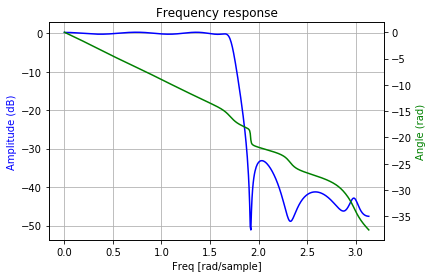

In [12]:
plot_response (w, h)

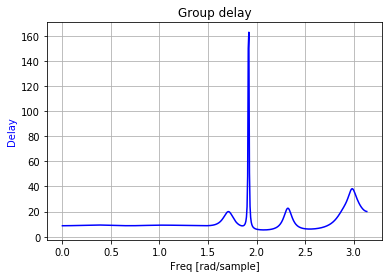

In [13]:
plot_delay (wgd, gd)

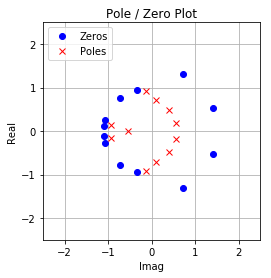

In [14]:
pole_zero_plot (poles, zeros)

## Second example ##

W.-S. Lu. Design of stable IIR digital filters with equiripple
passbands and peak-constrained least-squares stopbands.
IEEE Transactions on Circuits and Systems II: 85
Analog and Digital Signal Processing, 46(11):1421–1426,
November 1999.

Page 1425, plot on same page.


In [43]:
b0 = -0.00046047527
zeros = [ 18.63131093
        ,  1.49675301+0.48221524j
        ,  0.89762684+1.22910309j
        , -0.99895376+0.20015069j
        , -0.20222995+0.97998167j
        , -0.84535803+0.56243645j
        , -0.35458606+0.93926134j
        , -0.59858640+0.81318261j
        ]
poles = [  0.20628660
        ,  0.055677115+0.55763187j
        , -0.032471477+0.93555574j
        ,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0
        ]
update_conjugate_complex (zeros)
update_conjugate_complex (poles)

In [44]:
(b, a) = zpk2tf (zeros, poles, b0)
w, h = freqz (b, a)
wgd, gd = group_delay ((b, a))

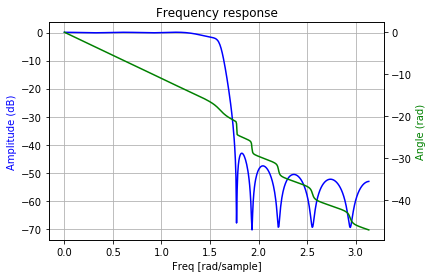

In [46]:
plot_response (w, h)

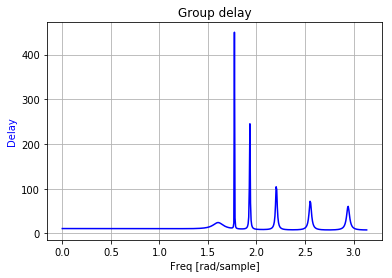

In [18]:
plot_delay (wgd, gd)

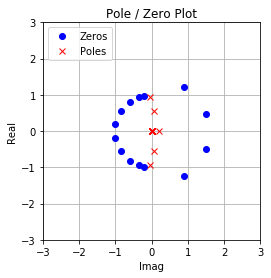

In [19]:
pole_zero_plot (poles, zeros, limit = 3)

## Third example ##
#### Taken from:

Rainer Storn. Differential evolution design of an IIR-filter with
requirements for magnitude and group delay. Technical Report
TR-95-026, International Computer Science Institute (ICSI), June
1995.

#### See also:

Rainer Storn. Differential evolution design of an IIR-filter. In
IEEE International Conference on Evolutionary Computation
(ICEC), pages 268–273, Nagoya, Japan, May 1996.

Reportedly this is a 7-degree FIR Pre-response-filter. But it only has 4 parameters. Hmm.

Note that the Frequency response is bogus, see the next graphics reconstructed from the frequency-response formula (13) from the technical report above. But we still don't know the design of the FIR-Pre-Filter.

-0.033271


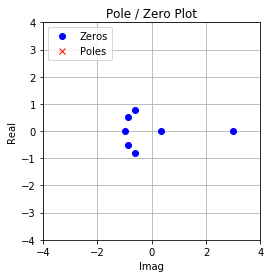

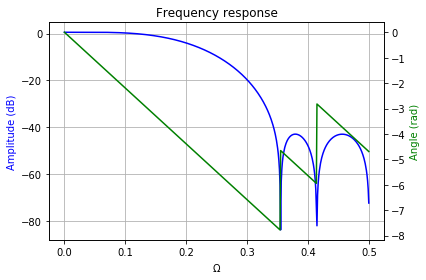

In [56]:
#fir = [-0.033271, -0.019816, 0.169865, 0.415454]
# Reverse-engineered FIR parameters, the commented list above is from the paper
# needed to find out that the parameters are re-used to make everything real.
# See accompanying maxima sheet.
fir = [-0.033271, -0.019816, 0.169865, 0.415454, 0.415454, 0.169865, -0.019816, -0.033271]

fir_zeros, fir_poles, fir_gain = tf2zpk (fir, [1.0])
print (fir_gain)
w, h = freqz (fir)
pole_zero_plot (fir_poles, fir_zeros)
plot_response (w, h, f0 = 1.0)

This is the frequency response of the Pre-Filter according to Storn technical report formula (1) (the part that belongs to the FIR filter)

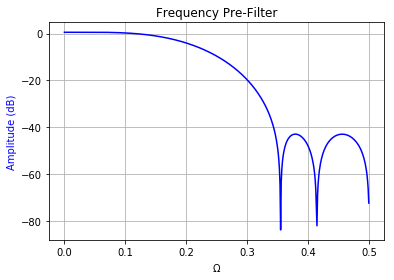

In [57]:
xa = []
ya = []
for i in  range (512) :
    phi = i / 512. * pi
    xa.append (phi / pi / 2.0)
    y = 0.0
    for k in range (4) :
        y += fir [k] * 2 * cos (phi * (k - 3.5))
    ya.append (abs (y))
fig = plt.figure ()
ax1 = fig.add_subplot (111)
plt.title ('Frequency Pre-Filter')
plt.plot (xa, 20 * np.log10 (ya), 'b')
plt.ylabel ('Amplitude (dB)', color = 'b')
plt.xlabel ('$\Omega$')

plt.grid ()
plt.axis ('tight')
plt.show ()

Parameters:
The first 5 are the radii of the zeros, the next five the angles of the zeros.
Then follow 4 radii of poles and 4 angles of poles.

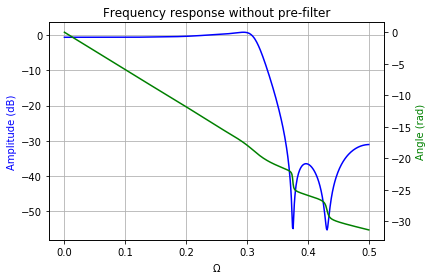

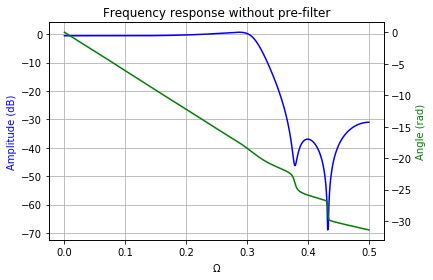

In [58]:
a0_1 = 0.00390625
params1 = \
 [ 1.620493889,  1.006124616,  1.016987443,  2.498671532,   1.919012547
 , 0.2243566662, 0.3745155931, 0.4304945767, 0.02474720217, 0.1109348238
 , 0.6369678974, 0.4702593982, 0.408888042,   0.8722907901
 , 0.2370584458, 0.125761658,  0.05192748457, 0.3109594584
 ]
a0_2 = 0.01
params2 = \
 [ 1.70534277,   1.019881606,  1.558364391,  1.001873851, 1.829733968
 , 0.1320674717, 0.3776784241, 0.2309984416, 0.4321155548, 0.04620760679
 , 0.8493334651, 0.3932341039,  0.6438843012, 0.5428563952
 , 0.3089904487, 0.01219726913, 0.2359268814, 0.124328509
 ]
zeros1 = [params1 [k]    * e ** (2j * pi * params1 [k+5])  for k in range (5)]
poles1 = [params1 [k+10] * e ** (2j * pi * params1 [k+14]) for k in range (4)]
zeros2 = [params2 [k]    * e ** (2j * pi * params2 [k+5])  for k in range (5)]
poles2 = [params2 [k+10] * e ** (2j * pi * params2 [k+14]) for k in range (4)]
# FIR-Pre-Filter: Multiply with other filter should convolve the first + second?
update_conjugate_complex (zeros1)
update_conjugate_complex (poles1)
update_conjugate_complex (zeros2)
update_conjugate_complex (poles2)
(b1, a1) = zpk2tf (zeros1, poles1, a0_1)
w1, h1 = freqz (b1, a1)
plot_response (w1, h1, title = 'Frequency response without pre-filter', f0 = 1.0)
(b2, a2) = zpk2tf (zeros2, poles2, a0_2)
w2, h2 = freqz (b2, a2)
plot_response (w2, h2, title = 'Frequency response without pre-filter', f0 = 1.0)

zeros1.extend (list (fir_zeros))
zeros2.extend (list (fir_zeros))
(b1, a1) = zpk2tf (zeros1, poles1, a0_1 * fir_gain)
w1, h1 = freqz (b1, a1)
wgd1, gd1 = group_delay ((b1, a1))
(b2, a2) = zpk2tf (zeros2, poles2, a0_2 * fir_gain)
w2, h2 = freqz (b2, a2)
wgd2, gd2 = group_delay ((b2, a2))

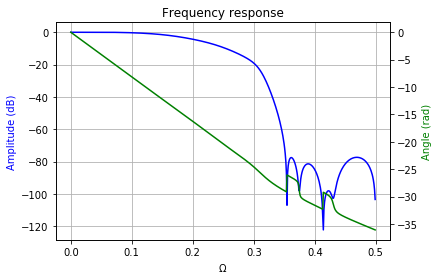

In [60]:
plot_response (w1, h1, f0 = 1.0)

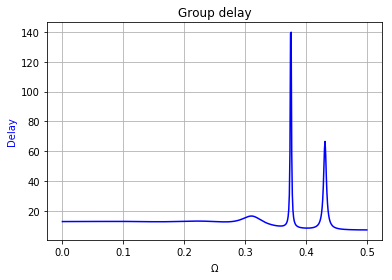

In [59]:
plot_delay (wgd1, gd1, f0 = 1.0)

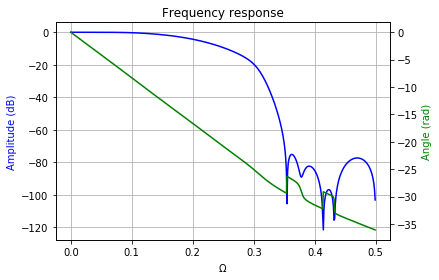

In [61]:
plot_response (w2, h2, f0 = 1.0)

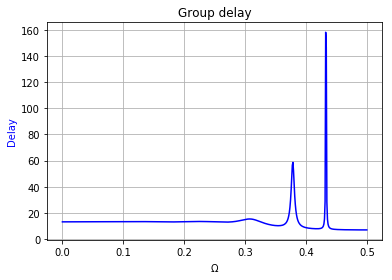

In [62]:
plot_delay (wgd2, gd2, f0 = 1.0)

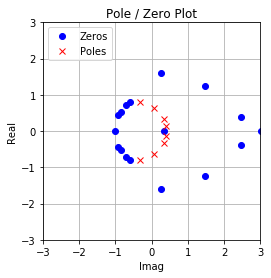

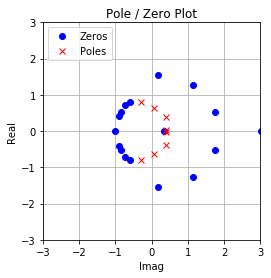

In [27]:
pole_zero_plot (poles1, zeros1, limit = 3)
pole_zero_plot (poles2, zeros2, limit = 3)

## Example 4: From DE Book ##
Kenneth V. Price, Rainer M. Storn, and Jouni A. Lampinen.
Differential Evolution: A Practical Approach to Global Optimization.
Springer, Berlin, Heidelberg, 2005.

Page 434 Table 7.12

(array([-1.1436981 +0.j        , -0.78186651+0.54873521j,
       -0.78186651-0.54873521j, -0.33471898+0.4283815j ,
       -0.33471898-0.4283815j ]), array([-0.29255553+0.83655009j, -0.29255553-0.83655009j,
        0.03949807+0.4715525j ,  0.03949807-0.4715525j ,
       -0.08275477+0.j        ]), 0.19881558418273926)


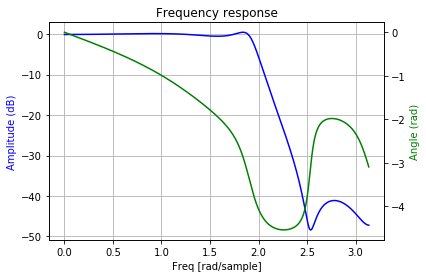

In [28]:
b = [ 0.19881558418273926
    , 0.6713742017745972 
    , 0.956078052520752  
    , 0.7260297536849976 
    , 0.29759085178375244
    , 0.0613178014755249 
    ]
a = [ 1.0
    , 0.5888696908950806
    , 1.0049885511398315
    , 0.14867675304412842
    , 0.18157732486724854
    , 0.014554023742675781
    ]
print (tf2zpk (b, a))
w, h = freqz (b, a)
wg, gd = group_delay ((b, a))
plot_response (w, h)

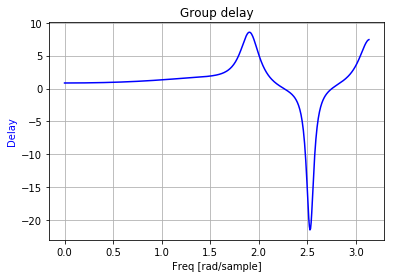

In [29]:
plot_delay (wg, gd)

[RIAA equalization:](https://en.wikipedia.org/wiki/RIAA_equalization)
Coefficients taken from sox source-code in file `biquads.c`, this
has different polynomials for different sampling rates.

[Forum Post](https://www.musicdsp.org/en/latest/Filters/122-digital-riaa-equalization-filter-coefficients.html)
The s-domain transfer function is

R3(1+R1*C1*s)(1+R2*C2*s)/(R1(1+R2*C2*s) + R2(1+R1*C1*s) +
R3(1+R1*C1*s)(1+R2*C2*s))

where
`R1 = 883.3k`
`R2 = 75k`
`R3 = 604`
`C1 = 3.6n`
`C2 = 1n`
This is based on the reference circuit found in http://www.hagtech.com/pdf/riaa.pdf
The coefficients of the digital transfer function `b(z^-1)/a(z^-1)`
in descending powers of z, are:

Note: This is the *inverse* RIAA (for recording not for playback) and one of 44.1 kHz or 48 kHz is wrong (they're identical).

#### 44.1kHz
```
b = [ 0.02675918611906  -0.04592084787595   0.01921229297239]
a = [ 1.00000000000000  -0.73845850035973  -0.17951755477430]
error +/- 0.25dB
```
#### 48kHz
```
b = [  0.02675918611906  -0.04592084787595   0.01921229297239]
a = [  1.00000000000000  -0.73845850035973  -0.17951755477430]
error +/- 0.15dB
```
#### 88.2kHz
```
b = [  0.04872204977233  -0.09076930609195   0.04202280710877]
a = [ 1.00000000000000  -0.85197860443215  -0.10921171201431]
error +/- 0.01dB
```
#### 96kHz
```
b = [ 0.05265477122714  -0.09864197097385   0.04596474352090  ]
a = [  1.00000000000000  -0.85835597216218  -0.10600020417219 ]
error +/- 0.006dB
```

Later post:
FYI, here are working filter coefficients for biquad implementation
of RIAA EQ Reproduction filters:

#### 44.1kHz:
```
a = [ 1.0000000000 -1.7007240000  0.7029381524 ]
b = [ 1.0000000000 -0.7218922000 -0.1860520545 ]
error ~0.23dB
```
#### 48kHz:
```
a = [ 1.0000000000 -1.7327655000  0.7345534436 ]
b = [ 1.0000000000 -0.7555521000 -0.1646257113 ]
error ~0.14dB
```
#### 88.2kHz:
```
a = [ 1.0000000000 -1.8554648000  0.8559721393 ]
b = [ 1.0000000000 -0.8479577000 -0.1127631993 ]
error 0.008dB
```
#### 96kHz:
```
a = [ 1.0000000000 -1.8666083000  0.8670382873 ]
b = [ 1.0000000000 -0.8535331000 -0.1104595113 ]
error ~0.006dB
```
```
#### NOTES:
- By swapping the a1<->b1 and a2<->b2 you'll get the production filter.
- All these given filter coefficients produces a bit gained filter
  (~+12.5dB or so) so, if you like to adjust the 1 kHz = 0dB, it can
  be done quite accurately by finding linear difference using software
  like Tobybear's FilterExplorer. Enter coefficients into
  FilterExplorer, by moving mouse cursor over the plotted magnitude
  curve in magnitude plot window, find/point the ~1kHz position and
  then check the magnitude value (value inside the brackets) found in
  info field. Use this value as divider for b coefficients.



In [30]:
# Coefficients from the forum post.
# Note that either the 44.1 or the 48 kHz value is bogus
# These are the *recording* values not the playback values
riaa = \
{   '44.1' :
    dict
        ( b = [0.02675918611906, -0.04592084787595,  0.01921229297239]
        , a = [1.00000000000000, -0.73845850035973, -0.17951755477430]
        )
,   '48.0' :
    dict
        ( b = [0.02675918611906, -0.04592084787595,  0.01921229297239]
        , a = [1.00000000000000, -0.73845850035973, -0.17951755477430]
        )
,   '88.2' :
    dict
        ( b = [0.04872204977233, -0.09076930609195,  0.04202280710877]
        , a = [1.00000000000000, -0.85197860443215, -0.10921171201431]
        )
,   '96.0' :
    dict
        ( b = [0.05265477122714, -0.09864197097385,  0.04596474352090]
        , a = [1.00000000000000, -0.85835597216218, -0.10600020417219]
        )
}
for k in riaa :
    d = riaa [k]
    d ['w'], d ['h'] = freqz (d ['b'], d ['a'])
    d ['wg'], d ['gd'] = group_delay ((d ['b'], d ['a']))
    print (tf2zpk (d ['b'], d ['a']))

(array([0.9931716, 0.7229063]), array([ 0.93123263, -0.19277413]), 0.02675918611906)
(array([0.9931716, 0.7229063]), array([ 0.93123263, -0.19277413]), 0.02675918611906)
(array([1.00356989, 0.85943272]), array([ 0.96513548, -0.11315687]), 0.04872204977233)
(array([1.00328287, 0.87008907]), array([ 0.96787451, -0.10951854]), 0.05265477122714)


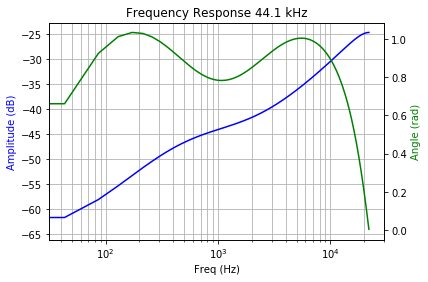

In [31]:
plot_response (riaa ['44.1']['w'], riaa ['44.1']['h'], 'Frequency Response 44.1 kHz', 44100, log = True)

In [32]:
# Later in same forum post, these are the playback values
riaa = \
{   '44.1' :
    dict
        ( a = [ 1.0000000000, -1.7007240000,  0.7029381524 ]
        , b = [ 1.0000000000, -0.7218922000, -0.1860520545 ]
        )
,   '48.0' :
    dict
        ( a = [ 1.0000000000, -1.7327655000,  0.7345534436 ]
        , b = [ 1.0000000000, -0.7555521000, -0.1646257113 ]
        )
,   '88.2' :
    dict
        ( a = [ 1.0000000000, -1.8554648000,  0.8559721393 ]
        , b = [ 1.0000000000, -0.8479577000, -0.1127631993 ]
        )
,   '96.0' :
    dict
        ( a = [ 1.0000000000, -1.8666083000,  0.8670382873 ]
        , b = [ 1.0000000000, -0.8535331000, -0.1104595113 ]
        )
}
for k in riaa :
    d = riaa [k]
    d ['w'], d ['h'] = freqz (d ['b'], d ['a'])
    d ['wg'], d ['gd'] = group_delay ((d ['b'], d ['a']))
    d ['zeros'], d ['poles'], d ['gain'] = tf2zpk (d ['b'], d ['a'])
    print (tf2zpk (d ['b'], d ['a']))

(array([ 0.923382 , -0.2014898]), array([0.9924091, 0.7083149]), 1.0)
(array([ 0.932159 , -0.1766069]), array([0.993133 , 0.7396325]), 1.0)
(array([ 0.9648312, -0.1168735]), array([0.9964002, 0.8590646]), 1.0)
(array([ 0.9676817, -0.1141486]), array([0.9966946, 0.8699137]), 1.0)


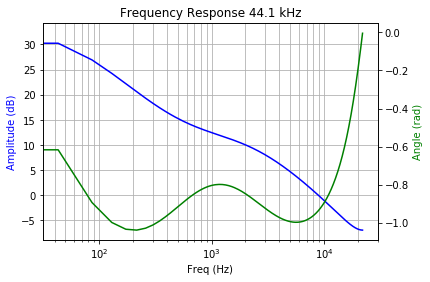

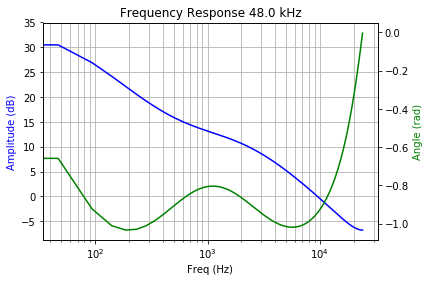

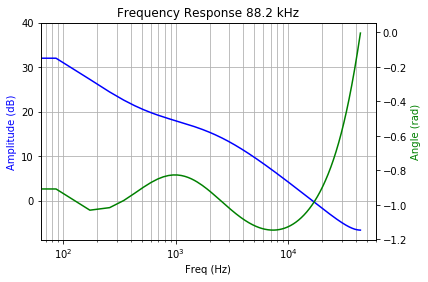

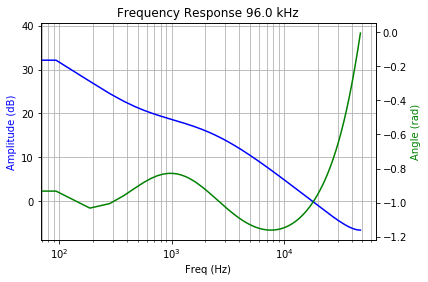

In [33]:
for k in riaa :
    d = riaa [k]
    plot_response (d ['w'], d ['h'], 'Frequency Response %s kHz' % k, f0 = 1000 * float (k), log=1)
    #plot_delay (d ['wg'], d ['gd'], title = 'Group delay %s kHz' % k, f0 = 1000 * float (k), log=1)

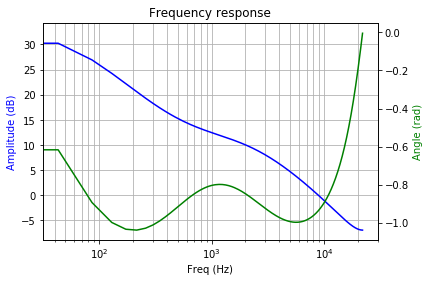

In [34]:
# Values from source-code of sox
sox_riaa = {}
sox_riaa ['44.1'] = dict \
    ( zeros = [-0.2014898, 0.9233820]
    , poles = [ 0.7083149, 0.9924091]
    )
sox_riaa ['48.0'] = dict \
    ( zeros = [-0.1766069, 0.9321590]
    , poles = [ 0.7396325, 0.9931330]
    )
sox_riaa ['88.2'] = dict \
    ( zeros = [-0.1168735, 0.9648312]
    , poles = [ 0.8590646, 0.9964002]
    )
sox_riaa ['96.0'] = dict \
    ( zeros = [-0.1141486, 0.9676817]
    , poles = [ 0.8699137, 0.9966946]
    )

# Check that RIAA params from forum are identical with sox params
for k in riaa :
    for zp in 'zeros', 'poles' :
        for n1, n2 in zip (sorted (sox_riaa [k][zp]), sorted (riaa [k][zp])) :
            #print (n1, n2, n1 - n2)
            assert abs (n1 - n2) < 5e-10

(b, a) = zpk2tf (sox_riaa ['44.1']['zeros'], sox_riaa ['44.1']['poles'], 1.0)
w, h = freqz (b, a)
wg, gd = group_delay ((b, a))
plot_response (w, h, f0=44100, log = True)

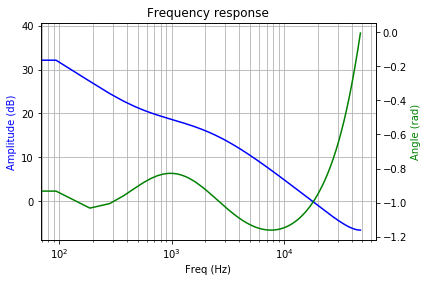

In [35]:
(b, a) = zpk2tf (sox_riaa ['96.0']['zeros'], sox_riaa ['96.0']['poles'], 1.0)
w, h = freqz (b, a)
wg, gd = group_delay ((b, a))
plot_response (w, h, f0 = 96000, log = True)


analog gain: 0.0014936969172174386
Gain @1kHz: 1.0


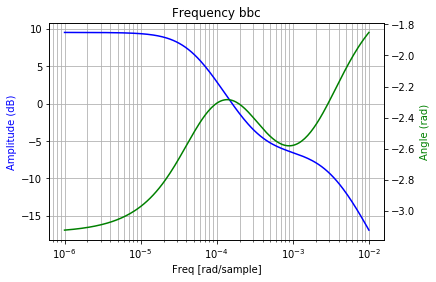

digital gain: 0.3529804920367236
digital gain: 0.35298049203672355
digital gain: 0.35298049203672355
digital gain: 0.35298049203672355
Gain @1kHz: 1.0
(array([0.93117565]), array([0.99289463, 0.63539099]), 0.35298049203672355)
a: [ 1.         -1.62828562  0.6308763 ] b: [ 0.35298049 -0.32868684]


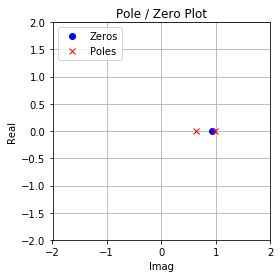

analog gain: 8.931254449400017
Gain @1kHz: 1.0000000000000002


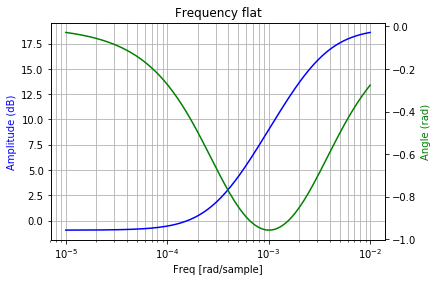

digital gain: 0.9248528879978533
digital gain: 0.9248528879978533
digital gain: 0.9248528879978533
digital gain: 0.9248528879978533
Gain @1kHz: 1.0
(array([0.93138382]), array([0.99289463]), 0.9248528879978533)
a: [ 1.         -0.99289463] b: [ 0.92485289 -0.86139302]


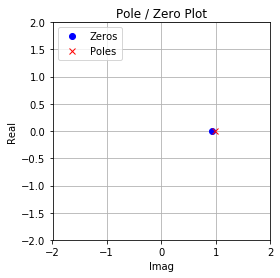

analog gain: 1.2526368744474159e-05
Gain @1kHz: 0.9999999999999997


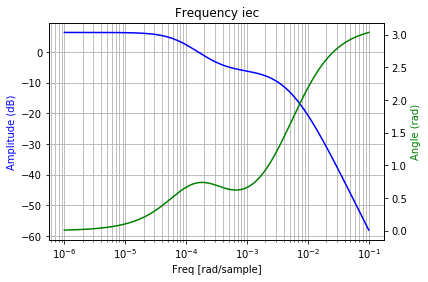

digital gain: 0.03787664699500824
digital gain: 0.037876646995008256
digital gain: 0.03787664699500826
digital gain: 0.037876646995008256
Gain @1kHz: 1.0000000000000002
(array([0.93117565]), array([0.99715177, 0.99289463, 0.7390844 ]), 0.03787664699500826)
a: [ 1.         -2.7291308   2.46087888 -0.7317428 ] b: [ 0.03787665 -0.03526981]


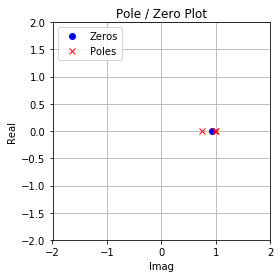

analog gain: 0.0015753282188563122
Gain @1kHz: 1.0


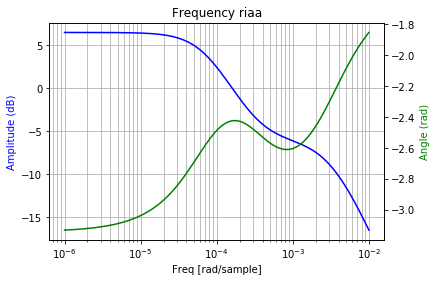

digital gain: 0.2663973182433691
digital gain: 0.26639731824336915
digital gain: 0.2663973182433692
digital gain: 0.26639731824336915
Gain @1kHz: 1.0000000000000002
(array([0.93117565]), array([0.99289463, 0.7390844 ]), 0.2663973182433692)
a: [ 1.         -1.73197903  0.73383293] b: [ 0.26639732 -0.2480627 ]


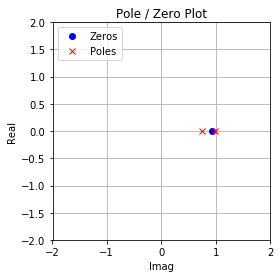

In [36]:
# Parameters from wikipedia
riaa = dict (szero = [318e-6], spole = [3180e-6, 75e-6], name = 'riaa')
bbc  = dict (szero = [318e-6], spole = [3180e-6, 50e-6], name = 'bbc')
flat = dict (szero = [319e-6], spole = [3180e-6], name = 'flat')
# Reportedly there should be an additional zero at 0.0
# But this fails in the digitization
iec  = dict (szero = [318e-6], spole = [3180e-6, 75e-6, 7950e-6], name = 'iec')

def PZ (T, fs = 44100) :
    return e ** (-1.0 / (T * fs))

fs = 44100

s1kHz = 1.0 / (2 * pi * 1000.)
analog_gain = 1.0

for filter in bbc, flat, iec, riaa :
    # Analog gain = 0dB @ 1kHz
    w, h = freqs_zpk (filter ['szero'], filter ['spole'], analog_gain, [s1kHz])
    #print (w, h, abs (h))
    analog_gain = abs (analog_gain / abs (h [0]))
    print ("analog gain:", analog_gain)
    w, h = freqs_zpk (filter ['szero'], filter ['spole'], analog_gain, [s1kHz])
    print ("Gain @1kHz:", abs (h [0]))
    # Plot response of analog filter
    w, h = freqs_zpk (filter ['szero'], filter ['spole'], analog_gain)
    plot_response (w, h, title='Frequency %s' % filter ['name'], log=True)

    # First stab at digital gain computation
    #g = 1.0
    filter ['zero'] = []
    filter ['pole'] = []
    for z in filter ['szero'] :
        pz = PZ (z, fs)
        #g  = g * (z) / (1.0 - pz)
        filter ['zero'].append (pz)
    for p in filter ['spole'] :
        pz = PZ (p, fs)
        #g = g / (p) * (1.0 - pz)
        filter ['pole'].append (pz)
    #g = abs (g)
    #print ("computed digital gain:", g, g * analog_gain)
    #g = g * analog_gain

    # Digital gain = 0dB @ 1kHz
    digital_gain = 1.0
    z1kHz = 1000.0 / fs * 2 * pi
    for k in range (4) :
        (filter ['b'], filter ['a']) = zpk2tf (filter ['zero'], filter ['pole'], digital_gain)
        w, h = freqz (filter ['b'], filter ['a'], [z1kHz])
        #print (w, h, abs (h))
        digital_gain = abs (digital_gain / abs (h [0]))
        print ("digital gain:", digital_gain)
    print ("Gain @1kHz:", abs (h [0]))

    d = filter
    d ['w'], d ['h'] = freqz (d ['b'], d ['a'])
    d ['wg'], d ['gd'] = group_delay ((d ['b'], d ['a']))
    print (tf2zpk (d ['b'], d ['a']))
    print ('a:', d ['a'], 'b:', d ['b'])
    pole_zero_plot (filter ['pole'], filter ['zero'])

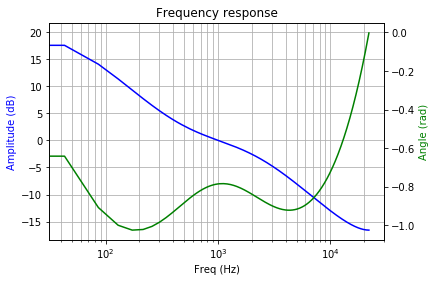

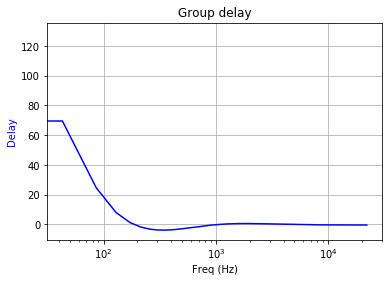

In [37]:
# From forum:
# a = [ 1.0000000000, -1.7007240000,  0.7029381524 ]
# b = [ 1.0000000000, -0.7218922000, -0.1860520545 ]
d ['w'], d ['h'] = freqz (d ['b'], d ['a'])
plot_response (d ['w'], d ['h'], f0 = 44100, log = True)
plot_delay (d ['wg'], d ['gd'], f0 = 44100, log = True)

## Moving Average filter ##
From
John G. Proakis and Dimitris G. Manolakis. Digital Signal
Processing: Principles, Algorithms, and Applications. Pearson,
Prentice Hall, Upper Saddle River, New Jersey, fourth edition, 2007.
p. 285

[-0.5+0.8660254j -0.5-0.8660254j] [] 0.3333333333333333
[1.0] [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


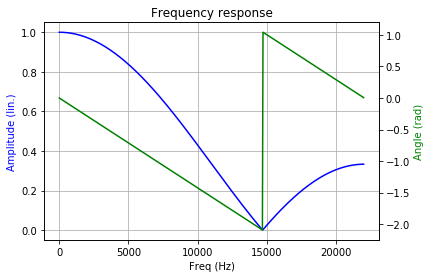

In [90]:
b = [1.0/3.0] * 3
a = [1.0]
z, p, g = tf2zpk (b, a)
print (z, p, g)
print (a, b)
w, h = freqz (b, a)
wg, gd = group_delay ((b, a))
plot_response (w, h, f0 = 44100, lin = True)
#plot_delay (wg, gd, f0 = 44100)
#pole_zero_plot (p, z)
xa = []
ya = []